In [1]:
# suppresing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# importing the dataset
df = pd.read_csv('/Users/sayanmaity/Desktop/Cuvette/Final Assignments/ML/ipl.csv')

In [5]:
# column names present in dataset
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
df.shape

(76014, 15)

In [7]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [8]:
df.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18/04/08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18/04/08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18/04/08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18/04/08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18/04/08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [9]:
# removing unwanted columns
df = df.drop(['mid','venue','batsman','bowler','striker','non-striker'], axis = 1, errors='ignore') # errors like space in column name will be ignored

In [10]:
# filtering consistent teams
consistent_teams = [
    'Chennai Super Kings',
    'Delhi Daredevils',
    'Kolkata Knight Riders',
    'Mumbai Indians',
    'Kings XI Punjab',
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad'
]

df = df[df['bat_team'].isin(consistent_teams) & df['bowl_team'].isin(consistent_teams)]

In [11]:
# Removing Early Match Data
df = df[df['overs']>=5]

In [12]:
# Date Conversion
df['date'] = pd.to_datetime(df['date'])

<function matplotlib.pyplot.show(close=None, block=None)>

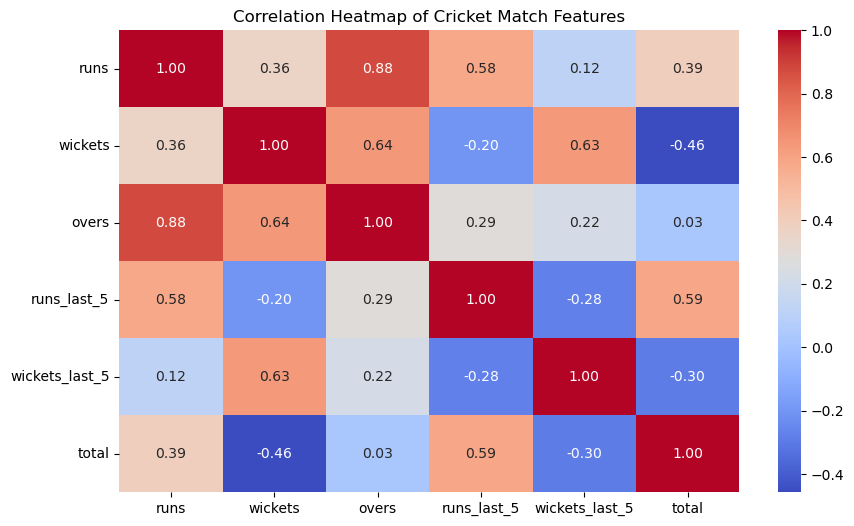

In [13]:
# Correlation Heatmap
df_numeric_columns = df.select_dtypes(include=['int64','float64'])

corr = df_numeric_columns.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap of Cricket Match Features")
plt.show

In [14]:
# one hot encoding
df = pd.get_dummies(df, columns=['bat_team', 'bowl_team'], dtype=int) 

In [30]:
df

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
# Splitting Data into Training and Testing Sets


X = df[df['date'].dt.year <= 2016] # all columns where seasons 1-9 i.e (2008-2016)
y = df[df['date'].dt.year == 2017] # all columns where season 10 i.e (2017)

X_train = X.drop(['total','date'], axis = 1) #drop the target column 'total' and the 'date' column which is datetime dtype - model cannot be trained on dtype other that numeric int
y_train = X['total'] 

X_test = y.drop(['total','date'], axis = 1) #droping the target column and date column same like training dataset
y_test = y['total']

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (37330, 21)
X_test shape: (2778, 21)


In [24]:
# Initialize models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost (Linear Regression)": AdaBoostRegressor(estimator=LinearRegression(), n_estimators=50, random_state=42)
}

In [17]:

# model training 
for name, model in models.items():
    model.fit(X_train, y_train)
    
# model predicting
    y_pred = model.predict(X_test)
    
# model evaluation
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

# Print the results
    print("--")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("--")

--
Mean Absolute Error (MAE): 12.12
Mean Squared Error (MSE): 251.01
Root Mean Squared Error (RMSE): 15.84
--
--
Mean Absolute Error (MAE): 17.11
Mean Squared Error (MSE): 539.92
Root Mean Squared Error (RMSE): 23.24
--
--
Mean Absolute Error (MAE): 13.86
Mean Squared Error (MSE): 337.23
Root Mean Squared Error (RMSE): 18.36
--
--
Mean Absolute Error (MAE): 12.08
Mean Squared Error (MSE): 244.80
Root Mean Squared Error (RMSE): 15.65
--


### The AdaBoost algorithm is applied to the Linear Regression model to improve its performance. However, it did not significantly reduce the error compared to the base Linear Regression model.

### Linear Regression is chosen as the final model due to its simplicity and better performance compared to other models.

In [28]:
def predict_ipl_score(model, X_columns):
    
    print("----- IPL Score Prediction -----")
    
    # Inputs of match details
    batting_team = input("Enter Batting Team: ")
    bowling_team = input("Enter Bowling Team: ")
    
    overs = float(input("Enter Overs: "))
    runs = int(input("Enter Runs Scored: "))
    wickets = int(input("Enter Wickets taken: "))
    runs_last_5 = int(input("Enter Runs in last 5 overs: "))
    wickets_last_5 = int(input("Enter Wickets in last 5 overs: "))
    
    
    input_data = pd.DataFrame(0, index=[0], columns=X_columns) # Create input row with same columns as training
    
    
    input_data['overs'] = overs # Fill numeric features
    input_data['runs'] = runs
    input_data['wickets'] = wickets
    input_data['runs_last_5'] = runs_last_5
    input_data['wickets_last_5'] = wickets_last_5
    
    
    bat_col = f'bat_team_{batting_team}' # Fill one-hot encoded columns for teams
    bowl_col = f'bowl_team_{bowling_team}'
    
    if bat_col in input_data.columns:
        input_data[bat_col] = 1
    else:
        print(f"Warning: {batting_team} not found in training data!")
    
    if bowl_col in input_data.columns:
        input_data[bowl_col] = 1
    else:
        print(f"Warning: {bowling_team} not found in training data!")
    
    # Predict total runs
    predicted_runs = model.predict(input_data)[0]
    
    # Combine predicted runs with current wickets as "runs/wickets"
    print(f"\nPredicted Score: {round(predicted_runs)}/{wickets}")


In [29]:
predict_ipl_score(model, X_train.columns)



----- IPL Score Prediction -----


Enter Batting Team:  Kolkata Knight Riders
Enter Bowling Team:  Delhi Daredevils
Enter Overs:  15
Enter Runs Scored:  120
Enter Wickets taken:  3
Enter Runs in last 5 overs:  50
Enter Wickets in last 5 overs:  2



Predicted Score: 164/3
